# Introduction to Scientific Programming with Python

 Session 4: NumPy, SciPy & matplotlib

 Denis Tome' -- D.Tome@cs.ucl.ac.uk -- http://www0.cs.ucl.ac.uk/staff/D.Tome/

## Importing numpy, scipy, and matplotlib

In [1]:
%matplotlib inline

### Start the Ipython process with
`ipython notebook` or `ipython qtconsole`, depending on your prefered interface.

Start your notebook with the following command - it enables the interactive plotting in your notebook or qtconsole:


or use

`%matplotlib qt`

if you are using the qtconsole interface

### Get plotting tools

we need both plotting tools and numpy for this tutorial

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Basic Plotting

 * Basic line and scatter plots can be created using the *plot* function from the *pylab* package
 * Below, the first list determines the x-coordinates and the second list the y -coordinates.

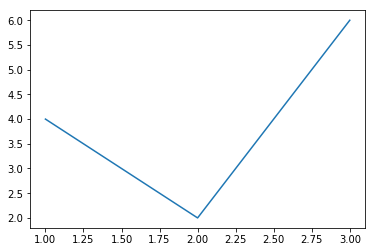

In [15]:
plt.plot([1,2,3],[4,2,6])

 * Use the *clf()* function to clear a figure, or the *figure()* function to start a new one.
 * Commonly used markers are ".", "o", "x" and line types "-", "--",  "-". but have a look at the help of the plot command if you need more.

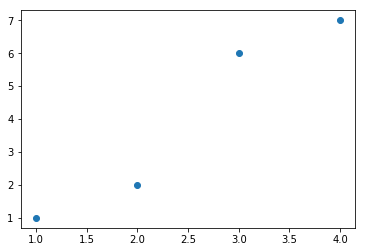

In [16]:
plt.plot([1,2,3,4],[1,2,6,7], 'o');

Note the `;` at the end of the plot statement above: it stops the statement from returning and so the `[<matplotlib.lines.Line2D at 0xb64b0b8>]` is not displayed.

In [17]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

 * Other useful functions (see below)
 * Try it out!

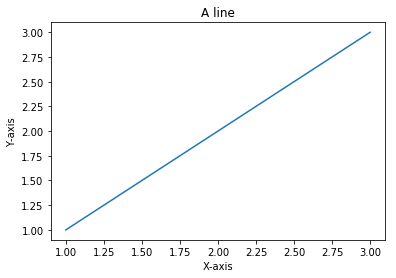

In [18]:
plt.plot([1,2,3],[1,2,3])
plt.title("A line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis");

## Example: Plotting a function

 * Let’s say you want to plot the function (in the math sense) $f (x) = 2x^2 + 3$ for $x$ in the range $[−3, 3]$. How would you do it?

f(0): 3
f(-3): 21
f(3): 21


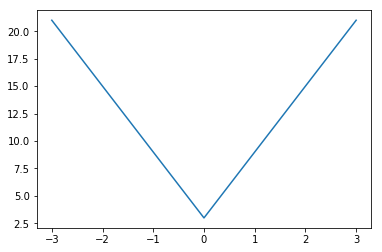

In [20]:
# Define a Python function that computes the function value
def f(x):
    return 2*x**2 + 3

print('f(0):', f(0))
print('f(-3):', f(-3))
print('f(3):', f(3))

plt.plot([-3, 0, 3], [f(-3), f(0), f(3)]);

 * We can use *range()* and list comprehensions

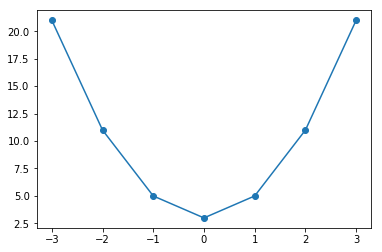

In [21]:
xs = range(-3, 4)
plt.plot(xs, [f(x) for x in xs],'o-');

 * Need smaller intervals ⇒ use *linspace* or *arange*

In [22]:
print('np.linspace\n', np.linspace(2.0, 3.0, num=5))
print('np.arange\n', np.arange(2, 3, 0.5))


np.linspace
 [2.   2.25 2.5  2.75 3.  ]
np.arange
 [2.  2.5]


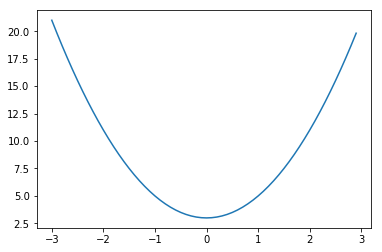

In [29]:
xs_1 = np.arange(-3,3,0.1)
plt.plot(xs_1, [f(x) for x in xs_1]);

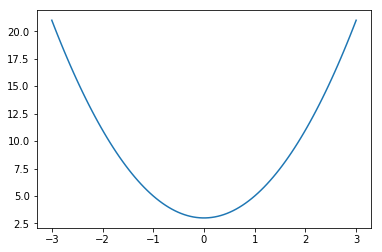

In [30]:
xs_2 = np.linspace(-3,3,100)
plt.plot(xs_2, [f(x) for x in xs_2]);

 * Wouldn’t it be nice if we could just write

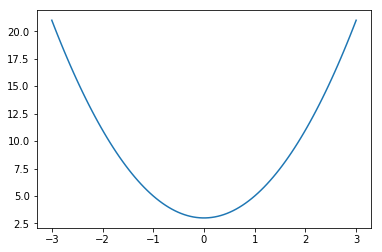

In [31]:
plt.plot(xs_2, 2*xs_2**2 + 3);

 * Oh, wait, we can!
 * What is going on? The magic here is that `arange` and `linspace` does not return a list like `range`, but a `numpy.ndarray`.
 * If we try it with a list, it doesn’t work

In [36]:
xs = range(-3,4)
plt.plot(xs, 2*xs**2 + 3)

TypeError: unsupported operand type(s) for ** or pow(): 'range' and 'int'

## Example: Linear Regression

 * Given pairs $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}),\ldots, (x^{(N)}, y^{(N)})\}$, where $x^{(i)} \in \mathbb{R}^D,y^{(i)} \in \mathbb{R}$
 * Goal find $w$ such that $y^{(i)} \approx f(x^{(i)}) :=    w^T x^{(i)}$
 * Measure of (mean squared) error $$\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N (y^{(i)} - f(x^{(i)}))^2$$

 * Rewrite as matrices/vectors $$y = \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)} \end{pmatrix}, \quad X = \begin{pmatrix} x^{(1)} \\ x^{(2)} \\ \vdots \\x^{(N)} \end{pmatrix}= \begin{pmatrix} x^{(1)}_1 & \cdots & x^{(1)}_{D} \\x_{1}^{(2)} & \cdots & x_{D}^{(2)} \\\vdots & \ddots & \vdots \\ x^{(N)}_{1} & \cdots &x^{(N)}_{D} \end{pmatrix}$$
 
 *  *Solution:* $w_{ls} = X^{\dagger}y = (X^TX)^{-1}X^T y$
 
### Simpler scalar case:

If each of the $x^{(i)}$ is just a scalar, i.e. it is in $\mathbb{R}$, the solutions simplifies to

$$\Rightarrow w= \frac{\sum_i x^{(i)} y^{(i)}}{\sum_i x^2}        $$

### Turn the math into python
 
* The simplest case with scalar $x$s can be written as

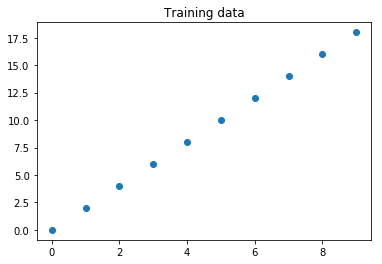

Learned w: 2.0


In [39]:
def f(x):
    return 2 * x

# Training data (x,y) pairs)
X = np.arange(10)
y = [f(xi) for xi in X]

# plot training data
plt.plot(X,y, 'o')
plt.title("Training data")
plt.show() # causes the plot to be shown NOW
# linear regression in 1D -> SIMPLEST SCENARIO
w = ( sum([X[i]*y[i] for i in range(len(X))])/ float(sum([x**2 for x in X])) )
print("Learned w:", w)

 * How does the learned function look like?

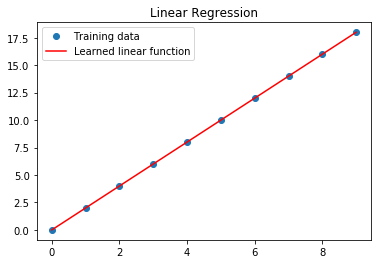

In [40]:
plt.plot(X,y, 'o')
plt.plot(X, w*X, 'r-')
plt.title("Linear Regression")
plt.legend(["Training data", "Learned linear function"]);

## The *ndarray* type

 * The *numpy.ndarray* type represents a multidimensional, homogeneous array of fixed-size items
 * You can __think of this as a table__, where each cell is of the same type and is indexed by a tuple of integer indices
 * Vectors (1-D) and matrices (2-D) are the most common examples, but higher-dimensional arrays are also often useful
 * For example, you can represent a video as a 4-D array (x, y, frame, channel)

 * A 1-D ndarray is similar to a list of numbers
 * However it makes it very easy to apply the same (mathematical) operation to all elements in the array
 * They also make it very easy to compute aggregates, like sums, means, products, sum-products, etc.

In [41]:
r = np.arange(1,4,1)
print('Element-wise operations')
print("r:", r)
print(3*r + 2)
print(np.sqrt(r))

print('\nOperations considering all the elements')
print(np.sum(r))
print(np.mean(r))
print(np.prod(r))

Element-wise operations
r: [1 2 3]
[ 5  8 11]
[1.         1.41421356 1.73205081]

Operations considering all the elements
6
2.0
6


 * *ndarray* objects have __two important attributes__:
  * The *data type* (*dtype*) of the objects in the cells
  * The *shape* of the array, describing the dimensionality and the size of the individual dimensions

In [43]:
a = np.zeros(shape = (3, 5), dtype = np.int64)
print("Array a:\n %r \n" % a)
print('Type of the variable:\n %r \n' % type(a))
print('Type of the objects in the cells:\n %r \n' % a.dtype)
print('Shape of the array:\n', a.shape)

Array a:
 array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64) 

Type of the variable:
 <class 'numpy.ndarray'> 

Type of the objects in the cells:
 dtype('int64') 

Shape of the array:
 (3, 5)


### Accessing Elements

 * Access to the individual elements is done using the familiar
[ ] syntax
 * __IMPORTANT__: The first element is the the one in __position 0, not 1__ (like Matlab)

In [44]:
a = np.zeros(shape = (3, 5), dtype = np.int64)
print('Element in position [0,0]:', a[0,0])
print(a)

Element in position [0,0]: 0
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [45]:
a[0,0] = 1
a[2,3] = 5
print(a)

[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 5 0]]


### Creating arrays

 * Arrays can be created in various ways:
  * from (nested) list objects (using *array*) by creating an empty array and then assigning values (using *empty*/*zeros*)
  * using built-in functions for special arrays (*ones*, *eye*, *rand*, *randn*, . . . )

In [48]:
a = np.array([3, 2, 1, 2])
print(a)

[3 2 1 2]


In [49]:
b = np.array([2.0, 4.1, 3.14])
print(b)

[2.   4.1  3.14]


In [51]:
c = np.array([[3, 1, 2], [2, 3, 4]])
print(c)

[[3 1 2]
 [2 3 4]]


 * Note that __numpy tries to guess the data type__:

In [52]:
print(a.dtype)
print(b.dtype)

int32
float64


 * We can force a particular data type by providing a dtype

In [53]:
a = np.array([3,2,1,2], dtype=np.float64)
print(a.dtype)
print(a)

float64
[3. 2. 1. 2.]


In [58]:
b = np.array([3,2,1,2], dtype=np.uint8)
print(b.dtype)
print(b)

uint8
[3 2 1 2]


 * __CAREFUL ABOUT OVER/UNDERFLOWS!__

In [59]:
b[0] = 256
print(b)

[0 2 1 2]


## Data types

 * Numpy provides a range of data types
  * __floating point__ data types: `float32`, `float64`
  * __integer__ data types: `int64`, `int32`, . . . , `uint8`
  * __object__ data type: object – any Python object
 * Unless you are sure you need something else, use `float64`. This is the default data type in numpy.
 * Exceptions to this rule:
  * use `int32`, `int64` when you need to store (large) integers (e.g. counts)
  * use objects when you need to store other Python objects (dicts, lists, etc.)

### Creating special arrays

 * Numpy provides various functions for creating useful special arrays. The most common ones are:
  * `zeros` – create an array filled with zeros
  * `ones` – create an array filled with ones
  * `empty` – create an array, but don’t initialize it’s elements.
  * `arange` – similar to range
  * `eye` – identity matrix of a given size
  * `random.rand`, `random.randn` – random arrays (uniform, normal)

In [60]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [61]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [62]:
np.empty((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [63]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

In [64]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [88]:
np.random.rand(2,3)

array([[ 0.95800881,  0.27233108,  0.54525544],
       [ 0.51234556,  0.17209455,  0.03634038]])

In [66]:
np.random.randn(2,3)

array([[-1.09080147,  0.28704304, -0.71335098],
       [ 0.08509239,  0.69245746, -0.39935834]])

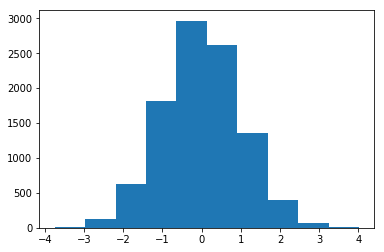

In [68]:
plt.hist(np.random.randn(10000));

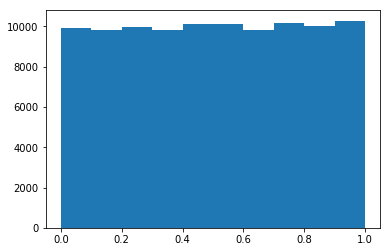

In [69]:
plt.hist(np.random.rand(100000));

### Dimensionality

 * Numpy arrays support the __slice notation__ familiar from strings and lists
 * Can be used to index contiguous sub-arrays
 * (Very similar to the notation used in Matlab)

In [70]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [71]:
a[0,:]

array([1., 0., 0.])

* which has exactly the same effect of writing

In [72]:
a[0]

array([1., 0., 0.])

* To get a set of elements
 * from position $i$
 * to position $j-1$

In [73]:
a[0:2,0:2]

array([[1., 0.],
       [0., 1.]])

In [74]:
a[1:2,0:2]

array([[0., 1.]])

In [75]:
a[0:1,:]

array([[1., 0., 0.]])

 * We can also assign new values to a subarray

In [76]:
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [77]:
a[0:2,0:2] = 5
print(a)

[[5. 5. 0.]
 [5. 5. 0.]
 [0. 0. 1.]]


In [78]:
a[1:3,1:3] = np.ones((2, 2))
print(a)

[[5. 5. 0.]
 [5. 1. 1.]
 [0. 1. 1.]]


### Accessing Subarrays – Boolean indexing

* Comparison operatorions on arrays return boolean arrays of the same size

In [79]:
a = np.eye(2)

In [80]:
a == 1

array([[ True, False],
       [False,  True]])

In [81]:
a > 0

array([[ True, False],
       [False,  True]])

In [82]:
a <= 0

array([[False,  True],
       [ True, False]])

* These boolean arrays can then be used for indexing the original array

In [83]:
a = np.eye(2)
print(a)

[[1. 0.]
 [0. 1.]]


In [106]:
a[a == 1]

array([ 1.,  1.])

In [84]:
a[a == 1] = 2
print(a)

[[2. 0.]
 [0. 2.]]


### Elementwise operations

 * Numpy contains many standard mathematical functions that __operate elementwise__ on arrays
 * These are called **universal functions** (ufuncs)
 * Included are things like *add*, *multiply*, *log*, *exp*, *sin*, . . .
 * See http://docs.scipy.org/doc/numpy/reference/ufuncs.html
 * These are very fast (in constrast to doing the same by loops)

In [85]:
a = np.ones((2, 2))*2
print(a)

[[2. 2.]
 [2. 2.]]


In [86]:
np.add(a, a)

array([[4., 4.],
       [4., 4.]])

In [87]:
a * a

array([[4., 4.],
       [4., 4.]])

In [88]:
np.log(a)

array([[0.69314718, 0.69314718],
       [0.69314718, 0.69314718]])

 __DON'T DO THIS__, it is *very* slow (for large arrays):

In [89]:
result = np.empty(a.shape)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        result[i,j] = a[i,j]*2
        
print(result)

[[4. 4.]
 [4. 4.]]


### Broadcasting

 * Broadcasting is how numpy handles operations between arrays of different, but compatible shapes
 * For example, you might want to add a column vector to all columns of a matrix

In [90]:
a = np.ones((2, 2))
b = 2 * np.ones((2, 1))
print("a:")
print(a)
print("b")
print(b)
print("a+b")
print(a + b)

a:
[[1. 1.]
 [1. 1.]]
b
[[2.]
 [2.]]
a+b
[[3. 3.]
 [3. 3.]]


In [91]:
a = np.ones((3, 2))
b = np.array([4, 5])
print("a:", a.shape)
print(a)
print("b:", b.shape)
print(b)

a: (3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
b: (2,)
[4 5]


In [92]:
print(a + b)

[[5. 6.]
 [5. 6.]
 [5. 6.]]


In [93]:
print(a * b)

[[4. 5.]
 [4. 5.]
 [4. 5.]]


### Reductions

* One of the most common operation one needs to do to an array is to sum its values along one of it’s dimensions.
* Again, this is much faster than looping over the array by hand.

In [94]:
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


In [95]:
np.sum(a)

10

In [96]:
np.sum(a, axis = 0)

array([4, 6])

In [97]:
np.sum(a, 1)

array([3, 7])

 * There are other reductions the behave the same way as *sum*, for example

In [98]:
print(a)

[[1 2]
 [3 4]]


In [99]:
np.prod(a)

24

In [100]:
np.mean(a)

2.5

In [101]:
np.mean(a, 0)

array([2., 3.])

In [102]:
np.cumsum(a)

array([ 1,  3,  6, 10], dtype=int32)

 * See http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#calculation

### Vector/Matrix operations

* Many algorithms in scientific computing can be cast in a form that makes use of only a few linear algebra primitves.
* Probably the most common such primitives are the __dot-product__ between vectors, matrix-vector products, as well as matrix-matrix products.
* The product between a matrix $A$ of size $M \times N$ and a matrix
$B$ of size $N \times K $, written as $\langle A, B \rangle$ or just $AB$ is defined as
$$(AB)_{ij} :=\sum_k A_{ik} B_{kj}$$

 * Numpy uses a single functions for all these operations: *dot*, both for arrays and matrices:

In [103]:
a = np.ones(2) * 3
print("a")
print(a)

a
[3. 3.]


In [104]:
b = np.array([[1, 2]]).T
print(b)

[[1]
 [2]]


In [105]:
A = np.random.rand(2,2)
print(A)

[[4.96819507e-01 7.22030077e-01]
 [5.93324468e-05 6.34543878e-01]]


In [106]:
np.dot(a,A)

array([1.49063652, 4.06972186])

In [107]:
np.dot(A,b)

array([[1.94087966],
       [1.26914709]])

In [108]:
np.dot(A,A)

array([[2.46872463e-01, 8.16878392e-01],
       [6.71265579e-05, 4.02688773e-01]])

## Regression revisited

 * Numpy makes your life much easier

In [109]:
# Training data (x,y) pairs)
X = np.array(range(10))
y = 2 * X

# linear regression in 1D
w = X.T.dot(y) / X.T.dot(X)
print("Learned w:", w)

Learned w: 2.0


### Linear Regression on noisy data

 * Use `randn` to add (Gaussian) noise $\mathcal{N}(0,1)$ to data
 * Real Life data almost always contains noise!
 * The normal distribution often is a good approximation to that, cf https://en.wikipedia.org/wiki/Gaussian_noise

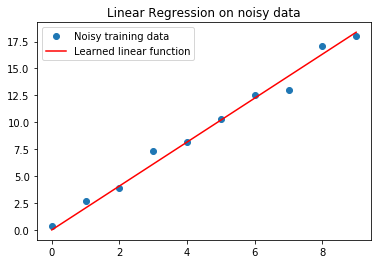

In [110]:
X = np.array(range(10))
y = 2 * X + np.random.randn(10)
w = X.T.dot(y) / X.T.dot(X)

plt.plot(X,y, 'o')
plt.plot(X, w * X, 'r-')
plt.title("Linear Regression on noisy data")
plt.legend(["Noisy training data", "Learned linear function"])

* Compare with the old code
* The numpy one is not only easier to read but also much (!) faster
* Worth diving into numpy documentation and built-in functions

In [111]:
w1 = X.T.dot(y) / X.T.dot(X)
w2 = ( sum([X[i]*y[i] for i in range(len(X))])/ float(sum([x**2 for x in X])) )
print(w1, w2)

2.0402668080857373 2.0402668080857373


## Scipy Overview

* SciPy is large collection of (sub-)packages that contains a variety of functions that are useful for scientific computing
* Impossible to cover all, check out the documentation and examples at http://wiki.scipy.org/Cookbook
* In particular, there are functions for
  * Special functions (scipy.special)
  * Integration (scipy.integrate)
  * Optimization (scipy.optimize)
  * Interpolation (scipy.interpolate)
  * Fourier Transforms (scipy.fftpack)
  * Signal Processing (scipy.signal)
  * Linear Algebra (scipy.linalg)
  * Statistics (scipy.stats)
  * Multi-dimensional image processing (scipy.ndimage)



## Examples

### Least Square Problem

Trying to solve something similar to what we have done before

In [112]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

c1, c2 = 5.0, 2.0
noise_p = 0.05
xi = 0.1*np.arange(1,11)
yi = c1*np.exp(-xi) + c2*xi
# Adding noise to the original points
zi = yi + noise_p * np.max(yi) * np.random.randn(len(yi))

In [113]:
# Matrix containing the input data
A = np.hstack([np.exp(-xi)[:, np.newaxis], xi[:,np.newaxis]])

# Solving the problem
c, resid, rank, sigma = linalg.lstsq(A, zi)

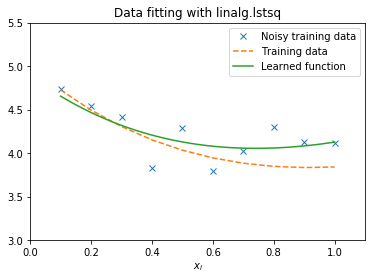

In [114]:
# See how the learned model behaves
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi, zi, 'x', xi, yi, '--', xi2, yi2)
plt.axis([0, 1.1, 3.0, 5.5])
plt.xlabel('$x_i$')
plt.legend(["Noisy training data", "Training data", "Learned function"])
plt.title('Data fitting with linalg.lstsq')
plt.show()